# A Tutorial on Vector Databases

### What are LLMs?

Large Language Models (LLMs) are foundational machine learning models that use deep learning algorithms to process and understand natural language. These models are trained on massive amounts of text data to learn patterns and entity relationships in the language. LLMs can perform many types of language tasks, such as translating languages, analyzing sentiments, chatbot conversations, and more. They can understand complex textual data, identify entities and relationships between them, and generate new text that is coherent and grammatically accurate.

### How do LLMs work?

LLMs are trained using a large amount of data, often terabytes, even petabytes, with billions or trillions of parameters, enabling them to predict and generate relevant responses based on the user’s prompts or queries. They process input data through word embeddings, self-attention layers, and feedforward networks to generate meaningful text

### LLMs and Vector Databases

Large Language Models (LLMs) are being utilized or integrated in many parts of industry, such as e-commerce, travel, search, content creation, and finance. These models rely on a relatively newer type of database, known as a vector database, which stores a numerical representation of text, images, videos, and other data in a binary representation called embeddings. This section highlights the fundamentals of vector databases and embeddings and, more significantly, focuses on how to use them to integrate with LLM applications.

A vector database is a database that stores and searches for embeddings using high-dimensional space. These vectors are numerical representations of a data’s features or attributes. Using algorithms that calculate the distance or similarity between vectors in a high-dimensional space, vector databases can quickly and efficiently retrieve similar data. Unlike traditional scalar-based databases that store data in rows or columns and use exact matching or keyword-based search methods, vector databases operate differently. They use vector databases to search and compare a large collection of vectors in a very short amount of time (order of milliseconds) using techniques such as Approximate Nearest Neighbors (ANN).

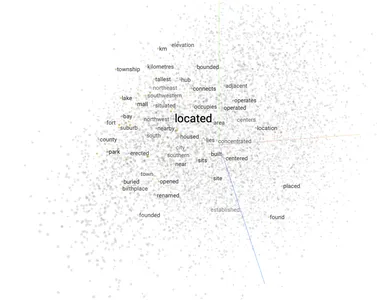

## A Quick Tutorial on Embeddings


AI models generate embeddings by inputting raw data such as text, video, images to a vector embedding library such as word2vec and In the context of AI and machine learning, these features represent different dimensions of the data that are essential for understanding patterns relationships, and underlying structures.



Here is an example of how to generate word embeddings using word2vec.


In [3]:
!pip install gensim

In [5]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 47.2 MB/s eta 0:00:00


In [6]:
import pandas as pd

In [7]:
import gensim

In [19]:
!gunzip '/content/reviews_Cell_Phones_and_Accessories_5.json.gz'

gzip: /content/reviews_Cell_Phones_and_Accessories_5.json.gz: No such file or directory


Simple Preprocessing & Tokenization
The first thing to do for any data science task is to clean the data. For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

In [20]:
df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"
...,...,...,...,...,...,...,...,...,...
194434,A1YMNTFLNDYQ1F,B00LORXVUE,eyeused2loveher,"[0, 0]",Works great just like my original one. I reall...,5,This works just perfect!,1405900800,"07 21, 2014"
194435,A15TX8B2L8B20S,B00LORXVUE,Jon Davidson,"[0, 0]",Great product. Great packaging. High quality a...,5,Great replacement cable. Apple certified,1405900800,"07 21, 2014"
194436,A3JI7QRZO1QG8X,B00LORXVUE,Joyce M. Davidson,"[0, 0]","This is a great cable, just as good as the mor...",5,Real quality,1405900800,"07 21, 2014"
194437,A1NHB2VC68YQNM,B00LORXVUE,Nurse Farrugia,"[0, 0]",I really like it becasue it works well with my...,5,I really like it becasue it works well with my...,1405814400,"07 20, 2014"


In [21]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)


In [22]:
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [23]:
review_text.loc[0]


['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

Training the Word2Vec Model
Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

In [24]:
# Initialize the model
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [25]:
# Build Vocabulary
model.build_vocab(review_text, progress_per=1000)

In [26]:
# Train the Word2Vec Model
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(61509250, 83868975)

In [27]:
model.save("./word2vec-amazon-cell-accessories-reviews-short.model")

In [28]:
# Finding Similar Words and Similarity between words
model.wv.most_similar("bad")


[('terrible', 0.6920978426933289),
 ('shabby', 0.6475433707237244),
 ('horrible', 0.622093141078949),
 ('good', 0.562190592288971),
 ('awful', 0.5490614771842957),
 ('okay', 0.5407091379165649),
 ('poor', 0.5308719873428345),
 ('crappy', 0.5299108028411865),
 ('ridiculous', 0.5251402258872986),
 ('lame', 0.5160020589828491)]

In [29]:
model.wv.similarity(w1="cheap", w2="inexpensive")

0.50083894

In [30]:
model.wv.similarity(w1="great", w2="good")

0.78294927

### LLM Application Architecture

At a high level, vector databases rely on embedding models for handling both the creation and querying of embeddings. On the ingestion path, the corpus content is encoded into vectors using the embedding model and stored in vector databases like Pinecone, ChromaDB, Weaviate, etc. On the read path, the application makes a query using sentences or words, and it is again encoded by the embedding model into a vector that is then queried into the vector db to fetch the results.

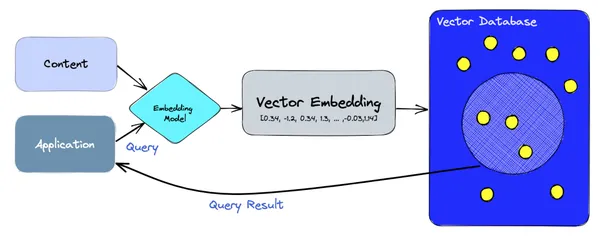


LLM helps in language tasks and is embedded into a broader class of models, such as Generative AI that can generate images and videos apart from just text. In this section, we will learn how to build practical LLM/Generative AI applications using vector databases. I used transformers and torch libs for language models and pinecone as a vector database. You can choose any language model for LLM/embeddings and any vector database for storage and searching.

### Building a Chatbot App


In [51]:
import faiss
from transformers import AutoTokenizer, AutoModel
import torch

In [52]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [53]:
def text_to_vector(text):
    tokens = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
    vector = torch.mean(outputs.last_hidden_state, dim=1).squeeze().numpy()
    return vector

In [54]:
class VectorDatabase:
    def __init__(self, vectors):
        self.dimension = len(vectors[0])
        self.vectors = np.array(vectors).astype('float32')
        self.index = faiss.IndexFlatL2(self.dimension)
        self.index.add(self.vectors)

    def search(self, query_vector, k=1):
        query_vector = np.array(query_vector).astype('float32')
        distances, indices = self.index.search(np.array([query_vector]), k)
        return indices[0]


In [55]:
class SimpleChatBot:
    def __init__(self, vector_database):
        self.vector_database = vector_database

    def get_response(self, user_query):
        # Convert user query to vector
        query_vector = text_to_vector(user_query)

        # Search for the most similar response
        similar_response_index = self.vector_database.search(query_vector)

        # Get the response corresponding to the most similar vector
        response = f"Bot: Placeholder response for index {similar_response_index}"

        return response

In [56]:
# Example vectors for the vector database
response_vectors = [
    text_to_vector("Hello, how can I help you?"),
    text_to_vector("I'm sorry, I don't understand."),
    text_to_vector("Thank you for chatting with me!"),
]

# Create a vector database
vector_db = VectorDatabase(response_vectors)

# Create a chat bot with the vector database
chat_bot = SimpleChatBot(vector_db)

# User query
user_query = "Tell me about your services."

# Get the bot's response
bot_response = chat_bot.get_response(user_query)

# Print the response
print(bot_response)


Bot: Placeholder response for index [2]
